In [160]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [161]:
# Download MBTA bus data if it hasn't been downloaded yet
from download_mbta_data import download_mbta_bus_data

download_mbta_bus_data()

data/MBTA_Bus_Arrival_Departure_Times_2024 folder already exists, skipping download and unzip
data/MBTA_Bus_Arrival_Departure_Times_2025 folder already exists, skipping download and unzip


In [162]:
from retrieve_weather_data import retrieve_weather_data

retrieve_weather_data()

2024 data already exists, skipping download


In [163]:
import pandas as pd
from glob import glob

mbta_files = glob("data/MBTA_Bus_Arrival_Departure_Times_2024/MBTA-Bus-Arrival-Departure-Times_2024*.csv")
mbta_data = pd.concat([pd.read_csv(f) for f in mbta_files], ignore_index=True)

mbta_data["route_id"].value_counts()

route_id
111    1294788
743     797474
28      770486
23      753176
SL1     738400
        ...   
192       5562
600       4410
171       4398
194       3216
rad         44
Name: count, Length: 153, dtype: int64

In [164]:
mbta_data.dropna(inplace=True)
mbta_data["route_id"].value_counts()

route_id
111    1170143
28      657199
23      640808
39      572285
66      562495
        ...   
240        416
24         374
95         368
04         322
08          17
Name: count, Length: 72, dtype: int64

In [165]:
filtered_mbta_data = mbta_data[["service_date","route_id", "scheduled" ,"actual"]]
filtered_mbta_data["service_date"] = pd.to_datetime(filtered_mbta_data["service_date"])
filtered_mbta_data["scheduled"] = pd.to_datetime(filtered_mbta_data["scheduled"])
filtered_mbta_data["actual"] = pd.to_datetime(filtered_mbta_data["actual"])


C:\Users\selms\AppData\Local\Temp\ipykernel_24652\1260497511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mbta_data["service_date"] = pd.to_datetime(filtered_mbta_data["service_date"])
C:\Users\selms\AppData\Local\Temp\ipykernel_24652\1260497511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mbta_data["scheduled"] = pd.to_datetime(filtered_mbta_data["scheduled"])
C:\Users\selms\AppData\Local\Temp\ipykernel_24652\1260497511.py:4: SettingWithCopyWarning: 
A value is trying to be 

In [166]:
#%pip install holidays
import holidays

filtered_mbta_data["day_of_week"] = filtered_mbta_data["service_date"].dt.dayofweek  # Monday=0
filtered_mbta_data["is_weekend"] = filtered_mbta_data["day_of_week"].isin([5, 6]).astype(int)

us_holidays = holidays.US(years=[2024])
filtered_mbta_data["is_holiday"] = filtered_mbta_data["service_date"].dt.date.isin(us_holidays).astype(int)

print(len(filtered_mbta_data))
filtered_mbta_data.head()

C:\Users\selms\AppData\Local\Temp\ipykernel_24652\1870068032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mbta_data["day_of_week"] = filtered_mbta_data["service_date"].dt.dayofweek  # Monday=0
C:\Users\selms\AppData\Local\Temp\ipykernel_24652\1870068032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mbta_data["is_weekend"] = filtered_mbta_data["day_of_week"].isin([5, 6]).astype(int)


10530554


C:\Users\selms\AppData\Local\Temp\ipykernel_24652\1870068032.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mbta_data["is_holiday"] = filtered_mbta_data["service_date"].dt.date.isin(us_holidays).astype(int)


,service_date,route_id,scheduled,actual,day_of_week,is_weekend,is_holiday
7,2024-01-01,01,1900-01-01 06:25:00+00:00,1900-01-01 06:26:09+00:00,0,0,1
8,2024-01-01,01,1900-01-01 06:29:00+00:00,1900-01-01 06:28:39+00:00,0,0,1
11,2024-01-01,01,1900-01-01 06:32:00+00:00,1900-01-01 06:32:37+00:00,0,0,1
12,2024-01-01,01,1900-01-01 06:35:00+00:00,1900-01-01 06:36:27+00:00,0,0,1
13,2024-01-01,01,1900-01-01 06:39:00+00:00,1900-01-01 06:40:08+00:00,0,0,1


C:\Users\selms\AppData\Local\Temp\ipykernel_24652\4260181374.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mbta_data["delay_minutes"] = (filtered_mbta_data["actual"] - filtered_mbta_data["scheduled"]).dt.total_seconds() / 60
C:\Users\selms\AppData\Local\Temp\ipykernel_24652\4260181374.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mbta_data["label"] = filtered_mbta_data["delay_minutes"].apply(assing_labels)


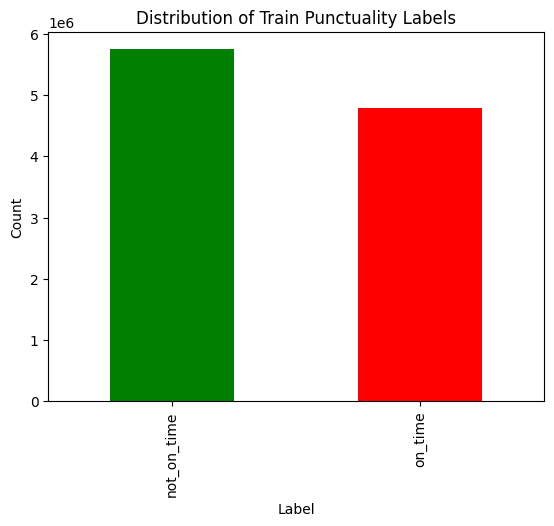

In [167]:
import matplotlib.pyplot as plt

# Calculate delay in minutes and assign labels
def assing_labels(delay):
    if -3 <= delay <= 3:
        return "on_time"
    else:
        return "not_on_time"

filtered_mbta_data["delay_minutes"] = (filtered_mbta_data["actual"] - filtered_mbta_data["scheduled"]).dt.total_seconds() / 60
filtered_mbta_data["label"] = filtered_mbta_data["delay_minutes"].apply(assing_labels)


filtered_mbta_data["label"].value_counts().plot(kind="bar", color=["green", "red", "blue"])
plt.title("Distribution of Train Punctuality Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [168]:
#Prepare weather data
weather_data = pd.read_csv("data/72509014739.csv")
weather_data["DATE"] = pd.to_datetime(weather_data["DATE"])
filtered_weather_data = weather_data[["DATE","WND","TMP","AA1","AA2","AA3"]]
def parse_precip(field):
    try:
        return float(field.split(",")[0]) / 10
    except:
        return 0.0
    
def parse_tmp_to_int(tmp):
    try:
        value = int(tmp.split(",")[0])
        return round(value / 10)
    except:
        return None  # handle missing or malformed values
    
def parse_wnd(wnd):
    try:
        parts = wnd.split(",")
        wind_dir_deg = int(parts[0])
        wind_speed_mps = round(int(parts[3]) / 10)
        return pd.Series({
            "wind_dir_deg": wind_dir_deg,
            "wind_speed_mps": wind_speed_mps
        })
    except:
        return pd.Series({
            "wind_dir_deg": None,
            "wind_speed_mps": None
        })
    
filtered_weather_data["precip_aa1"] = filtered_weather_data["AA1"].apply(parse_precip)
filtered_weather_data["precip_aa2"] = filtered_weather_data["AA2"].apply(parse_precip)
filtered_weather_data["precip_aa3"] = filtered_weather_data["AA3"].apply(parse_precip)
filtered_weather_data["TMP"] = filtered_weather_data["TMP"].apply(parse_tmp_to_int)
df_wind = filtered_weather_data["WND"].apply(parse_wnd)
filtered_weather_data = pd.concat([filtered_weather_data, df_wind], axis=1)

filtered_weather_data["precip_mm"] = filtered_weather_data[["precip_aa1", "precip_aa2", "precip_aa3"]].sum(axis=1)
filtered_weather_data = filtered_weather_data.drop(columns=["AA1","AA2","AA3"])
filtered_weather_data["is_rainy"] = (filtered_weather_data["precip_mm"] > 0).astype(int)

filtered_weather_data = filtered_weather_data[filtered_weather_data["TMP"] < 45]
filtered_weather_data = filtered_weather_data[filtered_weather_data["wind_speed_mps"] < 999]

filtered_weather_data.head()




C:\Users\selms\AppData\Local\Temp\ipykernel_24652\2002030834.py:2: DtypeWarning: Columns (34,42,43,47,52,84,87) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_data = pd.read_csv("data/72509014739.csv")
C:\Users\selms\AppData\Local\Temp\ipykernel_24652\2002030834.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_weather_data["precip_aa1"] = filtered_weather_data["AA1"].apply(parse_precip)
C:\Users\selms\AppData\Local\Temp\ipykernel_24652\2002030834.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,DATE,WND,TMP,precip_aa1,precip_aa2,precip_aa3,wind_dir_deg,wind_speed_mps,precip_mm,is_rainy
0,2024-01-01 00:00:00,"340,1,N,0046,1",2,0.0,0.0,0.0,340,5,0.0,0
1,2024-01-01 00:54:00,"350,5,N,0046,5",1,0.1,0.0,0.0,350,5,0.1,1
2,2024-01-01 01:54:00,"340,5,N,0036,5",1,0.1,0.0,0.0,340,4,0.1,1
3,2024-01-01 02:54:00,"340,5,N,0036,5",1,0.1,0.0,0.0,340,4,0.1,1
4,2024-01-01 03:00:00,"340,1,N,0036,1",1,0.0,0.0,0.0,340,4,0.0,0


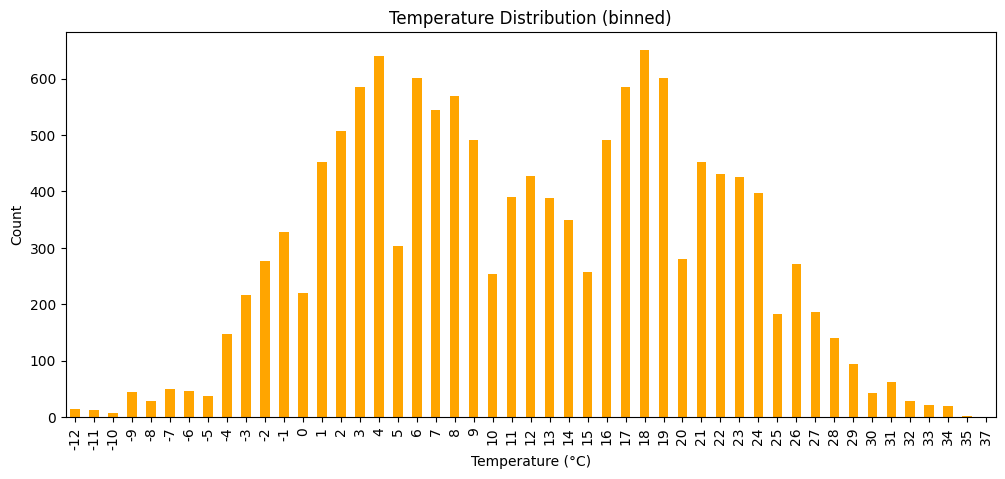

In [169]:
# Count per bin
temp_counts = filtered_weather_data["TMP"].value_counts().sort_index()

# Plot
temp_counts.plot(kind="bar", color="orange", figsize=(12,5))
plt.title("Temperature Distribution (binned)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()


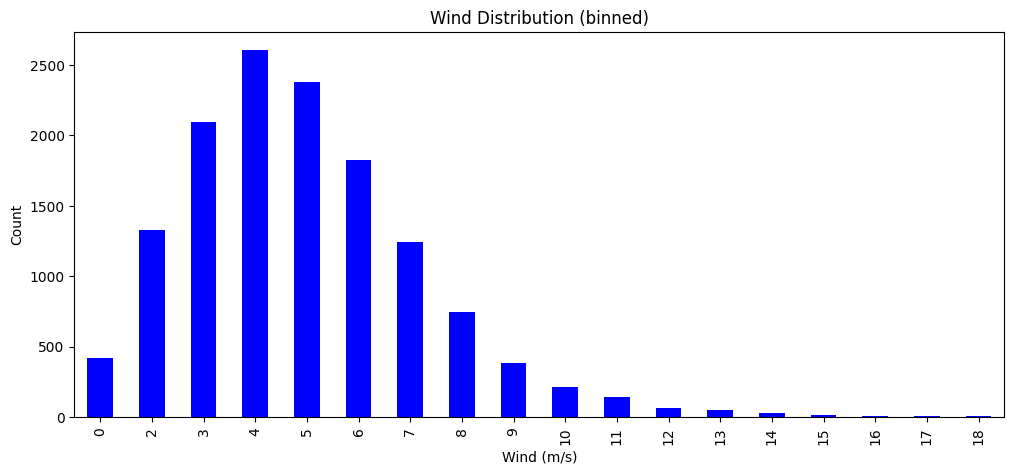

In [170]:
# Count per bin
wind_counts = filtered_weather_data["wind_speed_mps"].value_counts().sort_index()

# Plot
wind_counts.plot(kind="bar", color="blue", figsize=(12,5))
plt.title("Wind Distribution (binned)")
plt.xlabel("Wind (m/s)")
plt.ylabel("Count")
plt.show()

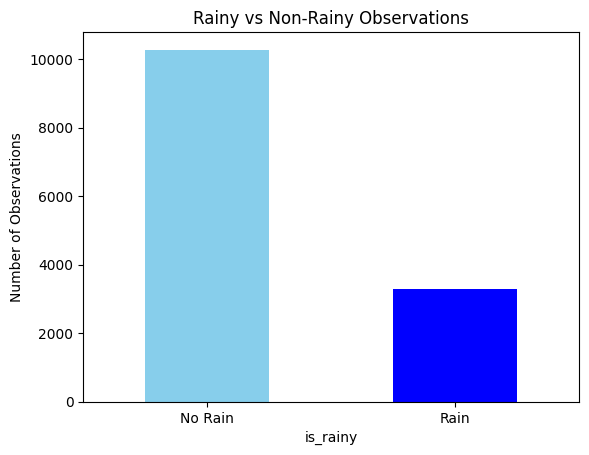

In [171]:
rain_counts = filtered_weather_data["is_rainy"].value_counts()

# Plot
rain_counts.plot(kind="bar", color=["skyblue", "blue"])
plt.xticks([0, 1], ["No Rain", "Rain"], rotation=0)
plt.ylabel("Number of Observations")
plt.title("Rainy vs Non-Rainy Observations")
plt.show()

In [172]:
# Merge based on closest timestamp
combined = pd.merge_asof(
    filtered_mbta_data.sort_values("service_date"),
    filtered_weather_data.sort_values("DATE"),
    left_on="service_date",
    right_on="DATE",
    direction="nearest",
    tolerance=pd.Timedelta("1h")
)

print(len(combined))

combined.dropna(inplace=True)
print(len(combined))
combined.head()

10530554
10530554


,service_date,route_id,scheduled,actual,day_of_week,is_weekend,is_holiday,delay_minutes,label,DATE,WND,TMP,precip_aa1,precip_aa2,precip_aa3,wind_dir_deg,wind_speed_mps,precip_mm,is_rainy
0,2024-01-01,01,1900-01-01 06:25:00+00:00,1900-01-01 06:26:09+00:00,0,0,1,1.150000,on_time,2024-01-01,"340,1,N,0046,1",2,0.0,0.0,0.0,340,5,0.0,0
1,2024-01-01,66,1900-01-01 21:21:00+00:00,1900-01-01 21:24:20+00:00,0,0,1,3.333333,not_on_time,2024-01-01,"340,1,N,0046,1",2,0.0,0.0,0.0,340,5,0.0,0
2,2024-01-01,66,1900-01-01 21:20:00+00:00,1900-01-01 21:19:51+00:00,0,0,1,-0.150000,on_time,2024-01-01,"340,1,N,0046,1",2,0.0,0.0,0.0,340,5,0.0,0
3,2024-01-01,66,1900-01-01 21:17:00+00:00,1900-01-01 21:21:49+00:00,0,0,1,4.816667,not_on_time,2024-01-01,"340,1,N,0046,1",2,0.0,0.0,0.0,340,5,0.0,0
4,2024-01-01,66,1900-01-01 21:13:00+00:00,1900-01-01 21:17:16+00:00,0,0,1,4.266667,not_on_time,2024-01-01,"340,1,N,0046,1",2,0.0,0.0,0.0,340,5,0.0,0


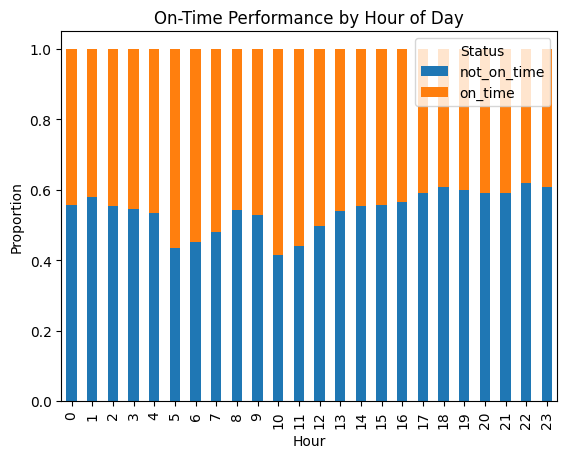

In [173]:
combined["hour"] = combined["actual"].dt.hour
combined.groupby("hour")["label"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)
plt.title("On-Time Performance by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Proportion")
plt.legend(title="Status")
plt.show()


In [174]:
combined['is_morning_peak'] = combined['hour'].between(7, 10)
combined['is_evening_peak'] = combined['hour'].between(16, 19)
combined['month'] = combined['service_date'].dt.month
combined['season'] = combined['month'] // 3

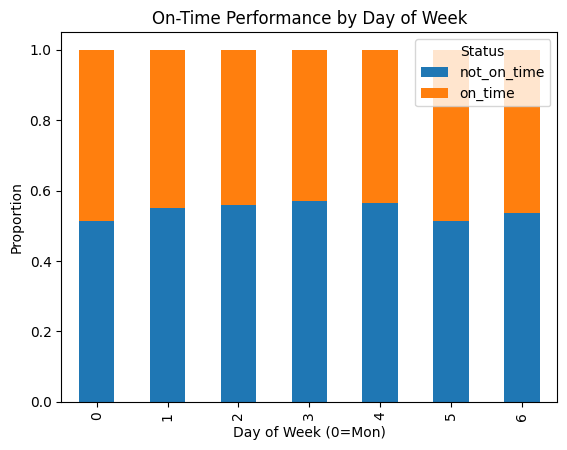

In [175]:
combined.groupby("day_of_week")["label"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)
plt.title("On-Time Performance by Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Proportion")
plt.legend(title="Status")
plt.show()

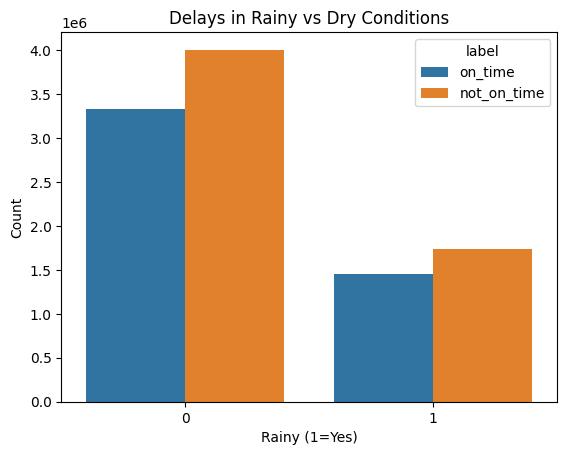

In [176]:
import seaborn as sns
sns.countplot(x="is_rainy", hue="label", data=combined)
plt.title("Delays in Rainy vs Dry Conditions")
plt.xlabel("Rainy (1=Yes)")
plt.ylabel("Count")
plt.show()


In [177]:
# Train random forest model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

label_encoder = LabelEncoder()
combined["label_encoded"] = label_encoder.fit_transform(combined["label"])
combined['route_encoded'] = LabelEncoder().fit_transform(combined['route_id'])

features = [
    "route_encoded", "day_of_week", "is_weekend", "is_holiday",
    "TMP", "is_rainy", "wind_speed_mps", "wind_dir_deg", "hour", "is_morning_peak", "is_evening_peak", "delay_minutes", "season", "month"
]

X = combined[features]
y = combined["label_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

route_avg = X_train.groupby("route_encoded")["delay_minutes"].mean().rename("route_avg_delay")
hour_avg = X_train.groupby("hour")["delay_minutes"].mean().rename("hour_avg_delay")
route_hour_avg = (
    X_train
    .groupby(["route_encoded", "hour"])["delay_minutes"]
    .mean()
    .rename("route_hour_avg_delay")
    .reset_index()
)

X_train = X_train.join(route_avg, on="route_encoded")
X_train = X_train.join(hour_avg, on="hour")
X_test = X_test.join(route_avg, on="route_encoded")
X_test = X_test.join(hour_avg, on="hour")
X_train = X_train.merge(route_hour_avg, on=["route_encoded", "hour"], how="left")
X_test = X_test.merge(route_hour_avg, on=["route_encoded", "hour"], how="left")


X_test["route_hour_avg_delay"].fillna(X_test["route_avg_delay"], inplace=True)

X_train = X_train.drop(columns=["delay_minutes"])
X_test = X_test.drop(columns=["delay_minutes"])

rf = RandomForestClassifier(
    class_weight="balanced_subsample",
    n_jobs=-1,
    random_state=42,
    n_estimators=500,
    max_depth=None,
    min_samples_split=3,
    verbose=2
)


rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 500
building tree 6 of 500
building tree 9 of 500
building tree 8 of 500
building tree 11 of 500
building tree 3 of 500
building tree 12 of 500
building tree 10 of 500
building tree 4 of 500
building tree 5 of 500
building tree 13 of 500
building tree 14 of 500
building tree 7 of 500
building tree 15 of 500
building tree 16 of 500
building tree 2 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   24.6s


building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68

[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  3.3min


building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500building tree 155 of 500

building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500building tree 186 of 500

building tree 187 of 500


[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  8.2min


building tree 350 of 500
building tree 351 of 500
building tree 352 of 500building tree 353 of 500

building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500building tree 360 of 500

building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500building tree 377 of 500

building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.7min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    8.8s
[Parallel(n_jobs=16)]: Done 333 tasks      | elapsed:   21.6s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:   32.2s finished


              precision    recall  f1-score   support

 not_on_time       0.71      0.64      0.68   1149478
     on_time       0.62      0.68      0.65    956633

    accuracy                           0.66   2106111
   macro avg       0.66      0.66      0.66   2106111
weighted avg       0.67      0.66      0.66   2106111



In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        solver="lbfgs",
        C=1.0
    ))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

 not_on_time       0.64      0.58      0.61   1149478
     on_time       0.55      0.61      0.58    956633

    accuracy                           0.59   2106111
   macro avg       0.60      0.60      0.59   2106111
weighted avg       0.60      0.59      0.60   2106111

